# Application web avec Flask

Flask est un micro framework open-source de développement web en Python. Il est classé comme microframework car il est très léger. Flask a pour objectif de garder un noyau simple mais extensible.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Flask_logo.svg/1200px-Flask_logo.svg.png'>


In [1]:
from flask import Flask, render_template, request
from functions import date_time, pred_and_show_image
import warnings
import urllib.request
import tensorflow as tf
import requests

warnings.filterwarnings('ignore')
date = date_time()

app = Flask(__name__)

# Page d'acceuil
@app.route('/', methods=['GET'])
def app_home():
    #1. Afficher sur le front la date et l'heure
    return render_template("index.html")

# Page d'action
@app.route('/submit/', methods=['POST', 'GET'])
def result():

    # 2. Charger le model

    #à_compléter : Charger le model
    print("Model loaded")

    if request.method == 'POST':
        path = "./static/assets/img.jpg"
        try:
            # 3. Récupérer l'image uploadée par l'utilisateur puis obtenir la prédiction du model

            # à_compléter : Obtenir l'image uploadée par l'utilisateur
            # à_compléter : Sauvegarder l'image dans le dossier static/assets
            # à_compléter : Préparer l'image pour le model
            # à_compléter : Prédire la classe de l'image


            return render_template("submit.html",
                                   
                                   # 4. Afficher la prédiction du model sur le front

                                    #à_compléter : Envoyer la prédiction du model,
                                    #à_compléter : Envoyer le chemin de l'image à afficher
                                    #à_compléter :  La probabilité de la prédiction
                                  )       
        except:
            return render_template("submit.html")

if __name__ == '__main__':
    app.run()

ModuleNotFoundError: No module named 'functions'

# Request et Response d'une URL

In [1]:
# Downloading the file from Azure from url : https://catdog.file.core.windows.net/cat/model.h5

import requests
url = 'https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8M3x8fGVufDB8fHx8fA%3D%3D&w=1000&q=80'
r = requests.get(url, allow_redirects=True)

open('img.jpeg', 'wb').write(r.content)

247743

## Import du model 

In [2]:
#Local 
import tensorflow as tf


model = tf.keras.models.load_model('model.h5')

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-05-30 15:38:11.752404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-30 15:38:11.752567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
#Azure Blob Storage

print("Downloading model")
url = 'https://catdog.blob.core.windows.net/blob/model.h5'
r = requests.get(url, allow_redirects=True)
open('model', 'wb').write(r.content)
print("Loading model")
model = tf.keras.models.load_model('model')

# Prédiction du modèle

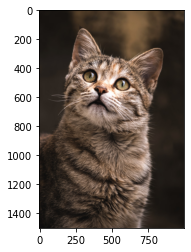

1/1 [==============================] - 0s 14ms/step
Prediction : Chat
Probabilité : 0.9978867173194885


In [5]:
from functions import pred_and_show_image
import matplotlib.pyplot as plt

path = "./img.jpeg"


#show image
plt.imshow(plt.imread(path))
plt.show()


class_, proba = pred_and_show_image(model, "./img.jpeg")

In [6]:
proba

0.9978867

In [3]:
import requests

In [4]:
img_url = "https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8M3x8fGVufDB8fHx8fA%3D%3D&w=1000&q=80"

response = requests.get('http://0.0.0.0:8000/predict', params={'img_url': img_url}).json()
response

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8000): Max retries exceeded with url: /predict?img_url=https%3A%2F%2Fimages.unsplash.com%2Fphoto-1608848461950-0fe51dfc41cb%3Fixlib%3Drb-4.0.3%26ixid%3DM3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8M3x8fGVufDB8fHx8fA%253D%253D%26w%3D1000%26q%3D80 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000026603D82250>: Failed to establish a new connection: [WinError 10049] L’adresse demandée n’est pas valide dans son contexte'))